## Assignment Tasks: ##

## Task 1: Exploratory Data Analysis (EDA) and Business Insights ##

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Customers Dataset Preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       

C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


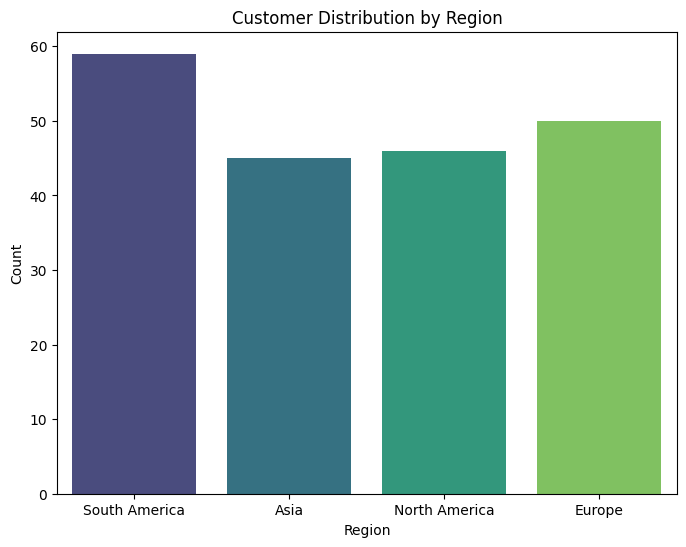

C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


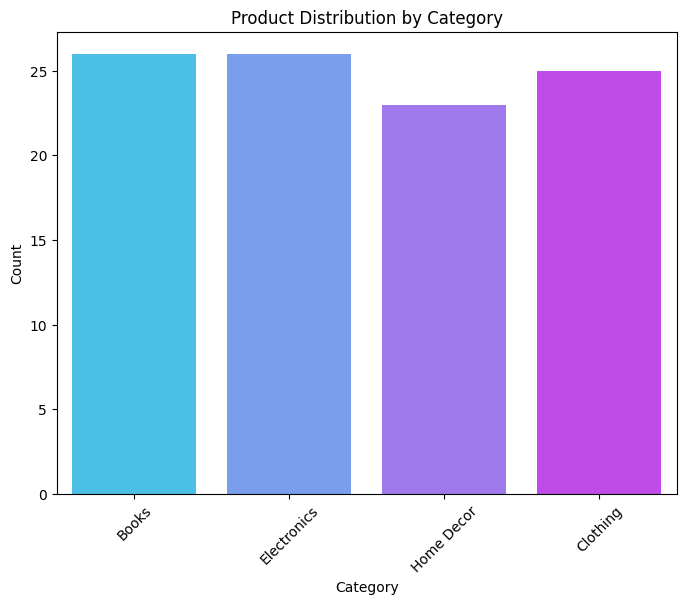

C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


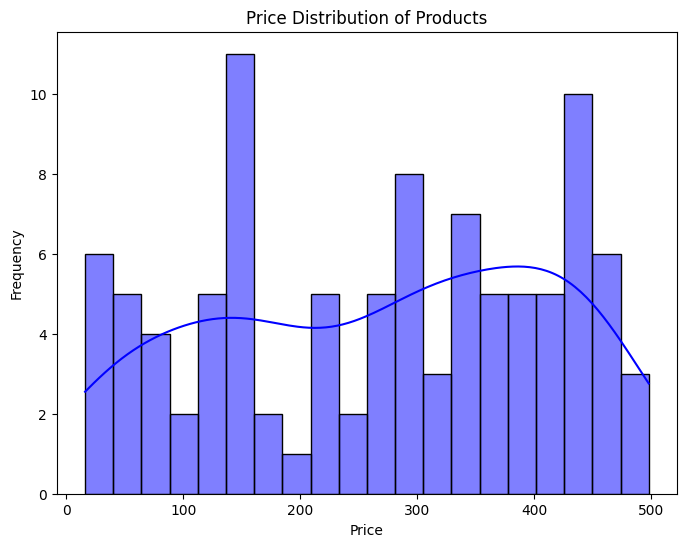

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_path = "C:/Users/bharg/Desktop/Zepto Assignment/Customers.csv"
products_path = "C:/Users/bharg/Desktop/Zepto Assignment/Products.csv"

customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)

# Display basic information about the datasets
print("Customers Dataset Info:")
print(customers_df.info())
print("\nCustomers Dataset Preview:")
print(customers_df.head())

print("\nProducts Dataset Info:")
print(products_df.info())
print("\nProducts Dataset Preview:")
print(products_df.head())

# Summary statistics
print("\nSummary Statistics for Customers Dataset:")
print(customers_df.describe(include='all'))

print("\nSummary Statistics for Products Dataset:")
print(products_df.describe(include='all'))

# Check for missing values
print("\nMissing Values in Customers Dataset:")
print(customers_df.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())

# Univariate Analysis: Distribution of Regions
plt.figure(figsize=(8, 6))
sns.countplot(data=customers_df, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Univariate Analysis: Distribution of Product Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=products_df, x='Category', palette='cool')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(products_df['Price'], kde=True, bins=20, color='blue')
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



## Task 2: Lookalike Model ##

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Define file paths correctly
customers_path = r"C:\Users\bharg\Desktop\Zepto Assignment\Customers.csv"
products_path = r"C:\Users\bharg\Desktop\Zepto Assignment\Products.csv"
transactions_path = r"C:\Users\bharg\Desktop\Zepto Assignment\Transactions.csv"

# Load datasets
customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

# Merge datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')
merged_df = merged_df.merge(products_df, on='ProductID', how='left')



# One-hot encode product categories and merge with customer features
if 'Category' in merged_df.columns:
    product_preferences = pd.get_dummies(merged_df[['CustomerID', 'Category']], columns=['Category'])
    product_preferences = product_preferences.groupby('CustomerID').sum().reset_index()

    # Prevent duplicate columns during merge
    customer_features = customer_features.merge(product_preferences, on='CustomerID', how='left', suffixes=('', '_dup'))

    # Drop duplicate columns if they exist
    duplicate_cols = [col for col in customer_features.columns if col.endswith('_dup')]
    customer_features.drop(columns=duplicate_cols, inplace=True)
else:
    print("Warning: 'Category' column not found in merged dataset. Skipping category encoding.")

# Normalize features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

# Compute similarity matrix
similarity_matrix = cosine_similarity(customer_features_scaled)

# Display the similarity matrix for verification
print("Customer Similarity Matrix (first 5 rows):\n", similarity_matrix[:5, :5])


Customer Similarity Matrix (first 5 rows):
 [[ 1.         -0.40579488  0.10560695  0.27049997  0.62725116]
 [-0.40579488  1.          0.82324866 -0.37559886  0.02499917]
 [ 0.10560695  0.82324866  1.         -0.15435399  0.43525085]
 [ 0.27049997 -0.37559886 -0.15435399  1.         -0.318309  ]
 [ 0.62725116  0.02499917  0.43525085 -0.318309    1.        ]]


In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Define file paths
customers_path = r"C:\Users\bharg\Desktop\Zepto Assignment\Customers.csv"
products_path = r"C:\Users\bharg\Desktop\Zepto Assignment\Products.csv"
transactions_path = r"C:\Users\bharg\Desktop\Zepto Assignment\Transactions.csv"

# Load datasets
customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

# Merge datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')
merged_df = merged_df.merge(products_df, on='ProductID', how='left')



# One-hot encode product categories and merge with customer features
if 'Category' in merged_df.columns:
    product_preferences = pd.get_dummies(merged_df[['CustomerID', 'Category']], columns=['Category'])
    product_preferences = product_preferences.groupby('CustomerID').sum().reset_index()

    # Merge customer features with product preferences
    customer_features = customer_features.merge(product_preferences, on='CustomerID', how='left', suffixes=('', '_dup'))

    # Drop duplicate columns
    duplicate_cols = [col for col in customer_features.columns if col.endswith('_dup')]
    customer_features.drop(columns=duplicate_cols, inplace=True)
else:
    print("Warning: 'Category' column not found in merged dataset. Skipping category encoding.")

# Normalize features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

# Compute similarity matrix using Cosine Similarity
similarity_matrix = cosine_similarity(customer_features_scaled)

# Get customer IDs
customer_ids = customer_features['CustomerID'].values

# Lookalike mapping for the first 20 customers (C0001 - C0020)
lookalike_map = {}

for i, customer_id in enumerate(customer_ids[:20]):
    # Get similarity scores for the customer
    similarities = list(enumerate(similarity_matrix[i]))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

    # Exclude the customer themselves and pick top 3 similar customers
    top_3 = [
        (customer_ids[idx], round(score, 2))
        for idx, score in similarities[1:4]
    ]

    lookalike_map[customer_id] = top_3

# Convert lookalike map to DataFrame
lookalike_df = pd.DataFrame([
    {'CustomerID': cust_id, 'Lookalikes': lookalikes}
    for cust_id, lookalikes in lookalike_map.items()
])

# Save Lookalike recommendations to CSV
lookalike_csv_path = r"C:\Users\bharg\Desktop\Zepto Assignment\Lookalike.csv"
lookalike_df.to_csv(lookalike_csv_path, index=False)

print(f"Lookalike recommendations saved to {lookalike_csv_path}")


Lookalike recommendations saved to C:\Users\bharg\Desktop\Zepto Assignment\Lookalike.csv


In [19]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Lookalike.csv')

# Print the contents of the DataFrame
print(df)


   CustomerID                                         Lookalikes
0       C0001  [('C0069', 0.95), ('C0146', 0.82), ('C0148', 0...
1       C0002  [('C0134', 0.94), ('C0062', 0.91), ('C0133', 0...
2       C0003  [('C0031', 0.87), ('C0166', 0.84), ('C0002', 0...
3       C0004  [('C0017', 0.89), ('C0113', 0.89), ('C0047', 0...
4       C0005  [('C0007', 0.94), ('C0120', 0.89), ('C0197', 0...
5       C0006  [('C0135', 0.98), ('C0185', 0.76), ('C0131', 0...
6       C0007  [('C0005', 0.94), ('C0120', 0.84), ('C0146', 0...
7       C0008  [('C0162', 0.94), ('C0113', 0.88), ('C0098', 0...
8       C0009  [('C0040', 0.88), ('C0092', 0.86), ('C0198', 0...
9       C0010  [('C0077', 0.94), ('C0176', 0.94), ('C0083', 0...
10      C0011  [('C0171', 0.91), ('C0070', 0.9), ('C0191', 0....
11      C0012  [('C0065', 0.97), ('C0047', 0.9), ('C0104', 0....
12      C0013  [('C0067', 0.96), ('C0184', 0.91), ('C0105', 0...
13      C0014  [('C0097', 1.0), ('C0151', 0.96), ('C0060', 0....
14      C0015  [('C0080',

## Task 3: Customer Segmentation / Clustering ##

C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

Clusters: 2, DB Index: 1.0009
Clusters: 3, DB Index: 0.9436
Clusters: 4, DB Index: 0.9112
Clusters: 5, DB Index: 0.9050
Clusters: 6, DB Index: 0.9355


C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

Clusters: 7, DB Index: 0.8476
Clusters: 8, DB Index: 0.8420
Clusters: 9, DB Index: 0.8318
Clusters: 10, DB Index: 0.7950


C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bharg\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

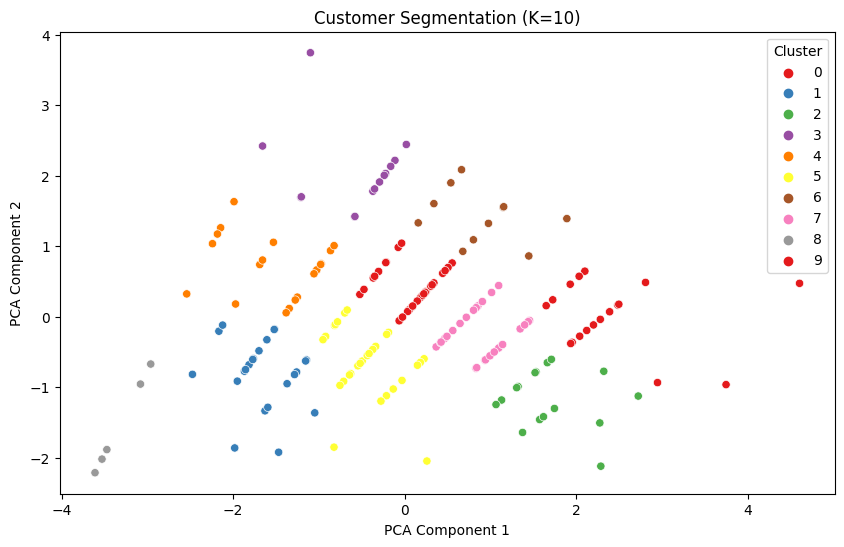

Clustered customer data saved to C:\Users\bharg\Desktop\Zepto Assignment\Clustered_Customers.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

# Load datasets
customers_df = pd.read_csv(r"C:\Users\bharg\Desktop\Zepto Assignment\Customers.csv")
transactions_df = pd.read_csv(r"C:\Users\bharg\Desktop\Zepto Assignment\Transactions.csv")

# Merge datasets on CustomerID
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')

# Feature Engineering
customer_features = merged_df.groupby('CustomerID').agg(
    total_spending=('Price', 'sum'),
    avg_spending=('Price', 'mean'),
    transaction_count=('TransactionID', 'count')
).reset_index()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

# Determine the optimal number of clusters using DB Index
db_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, cluster_labels)
    db_scores.append(db_index)
    print(f'Clusters: {k}, DB Index: {db_index:.4f}')

# Choose the optimal number of clusters (lowest DB Index)
optimal_k = cluster_range[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = reduced_features[:, 0]
customer_features['PCA2'] = reduced_features[:, 1]

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=customer_features)
plt.title(f'Customer Segmentation (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Save clustered data
output_path = r"C:\Users\bharg\Desktop\Zepto Assignment\Clustered_Customers.csv"
customer_features.to_csv(output_path, index=False)
print(f'Clustered customer data saved to {output_path}')
